In [1]:
##############      Configuración      ##############
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Dict
from dotenv import dotenv_values

pd.set_option("display.max_columns", None)
env = dotenv_values("D:/Maestría/Tesis/Repo/scripts/globals.env")

path_proyecto = env["PATH_PROYECTO"]
path_datain = env["PATH_DATAIN"]
path_dataout = env["PATH_DATAOUT"]
path_scripts = env["PATH_SCRIPTS"]
path_satelites = env["PATH_SATELITES"]
path_logs = env["PATH_LOGS"]
path_outputs = env["PATH_OUTPUTS"]

In [ ]:
import earthpy.plot as ep
import build_dataset as bd
import utils
import geopandas as gpd
import shapely
import skimage
import folium

raster_size = 58.435144 - 58.435139 # In epsg 4326 degrees

d:\Maestría\Tesis\Repo\scripts\build_dataset.py:82: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name
d:\Maestría\Tesis\Repo\scripts\build_dataset.py:82: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  icpag.loc[icpag.centroid.within(bbox), "dataset"] = name


Links without images: 3448 out of 15114


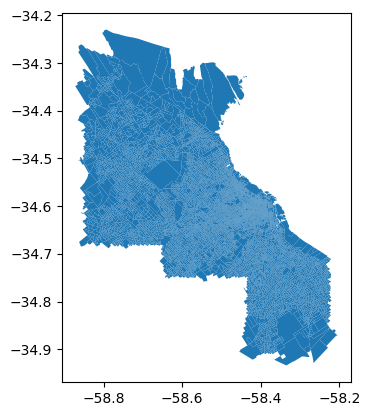

In [36]:
datasets, extents = bd.load_satellite_datasets()
icpag = bd.load_icpag_dataset()
icpag = bd.assign_links_to_datasets(icpag, extents)

# Seleccion de Imagenes

In [21]:
icpag.sample(5)

index       link         AREA  PERIMETER  PAISXRAD10  PAISXRAD_1  PROV  \
4105    4105  060350704    86980.500   1670.266       36067       36067     6   
13975  14819  068050302  1019602.875   5606.278       27078       27078     6   
6113    6113  062742123   758219.375   4179.048       41302       41302     6   
8763    9607  064341809    19193.500    568.747       37567       37567     6   
1707    1707  020072406    75207.125   1422.487       34918       34918     2   

       DEPTO  FRAC  RADIO TIPO  link_dpto        departamen  \
4105      35     7      4    U       6035        Avellaneda   
13975    805     3      2    U       6805             Tigre   
6113     274    21     23    U       6274  Florencio Varela   
8763     434    18      9    U       6434             Lanús   
1707       7    24      6    U       2007          Comuna 7   

                             provincia  eph_codagl        eph_aglome  codaglo  \
4105                      Buenos Aires         1.0  Partidos del GBA      1.0   
13975                     Buenos Aires         1.0  Partidos del GBA      1.0   
6113                      Buenos Aires         1.0  Partidos del GBA      1.0   
8763                      Buenos Aires         1.0  Partidos del GBA      1.0   
1707   Ciudad Autónoma de Buenos Aires         1.0              CABA      1.0   

              aglomerado  aglo_eph  AMBA_legal      rmin      rmax   rminp50  \
4105   Gran Buenos Aires         1           1  0.711278  0.412464  0.761967   
13975  Gran Buenos Aires         1           1  0.685057  0.374875  0.743471   
6113   Gran Buenos Aires         1           1  0.529753  0.216388  0.530130   
8763   Gran Buenos Aires         1           1  0.904563  0.720098  0.938238   
1707   Gran Buenos Aires         1           1  0.890838  0.648067  0.924610   

        rminp25   rminp75   rmaxp50   rmaxp25   rmaxp75          p_usd  \
4105   0.910812  0.550470  0.393851  0.635609  0.186808   56606.804932   
13975  0.919914  0.506501  0.320200  0.618785  0.130707  254601.758330   
6113   0.705480  0.388989  0.170887  0.328774  0.074474            NaN   
8763   0.983039  0.867945  0.755210  0.881915  0.603012  165851.104539   
1707   0.974586  0.852531  0.673382  0.832410  0.514758  263649.451660   

               pm2  obs_pm2     pm2_2019  obs_pm2_19     p_usd_2019  personas  \
4105    885.500793      8.0   725.000000         4.0   47500.000000     840.0   
13975  2666.151123    136.0  2940.078369       467.0  329020.799578     481.0   
6113           NaN      NaN          NaN         NaN            NaN    1156.0   
8763   1807.188965     21.0  1767.771240        15.0  136478.260870     490.0   
1707   1882.692749     16.0  1956.501343        11.0  133090.909091    1059.0   

       viv_part  lvp1bvp50  lvpra_1bvp  lvprf_1bvp     lvp1bv  lvpra_1bv  \
4105      285.0  11.351120   11.347108   11.317346  11.265293  11.262544   
13975     166.0  10.963884   10.945621   10.915858  10.990371  10.995857   
6113      299.0  10.851587   10.848849   10.819086  10.857020  10.854209   
8763      250.0  11.402524   11.396932   11.367169  11.454082  11.450765   
1707      456.0  11.666928   11.654130   11.600248  11.685939  11.674776   

       lvprf_1bv  superficie       den_p  rural1  rural2  urbano  mergelvp  \
4105   11.232781    87107.27   96.432824     0.0     0.0     1.0         3   
13975  10.966094  1019518.53    4.717913     0.0     0.0     1.0         3   
6113   10.824446   758547.74   15.239647     0.0     0.0     1.0         3   
8763   11.421001    19173.89  255.555863     0.0     0.0     1.0         3   
1707   11.620894    74413.88  142.312160     0.0     0.0     1.0         3   

       objectid_1  cod_fra  provdep     oid_  objectid    link_1  cod_fra_1  \
4105      15452.0   603507     6035  15451.0   15452.0  60350704     603507   
13975      7780.0   680503     6805   7779.0    7780.0  68050302     680503   
6113       5746.0   627421     6274   5745.0    5746.0  62742123     627421   

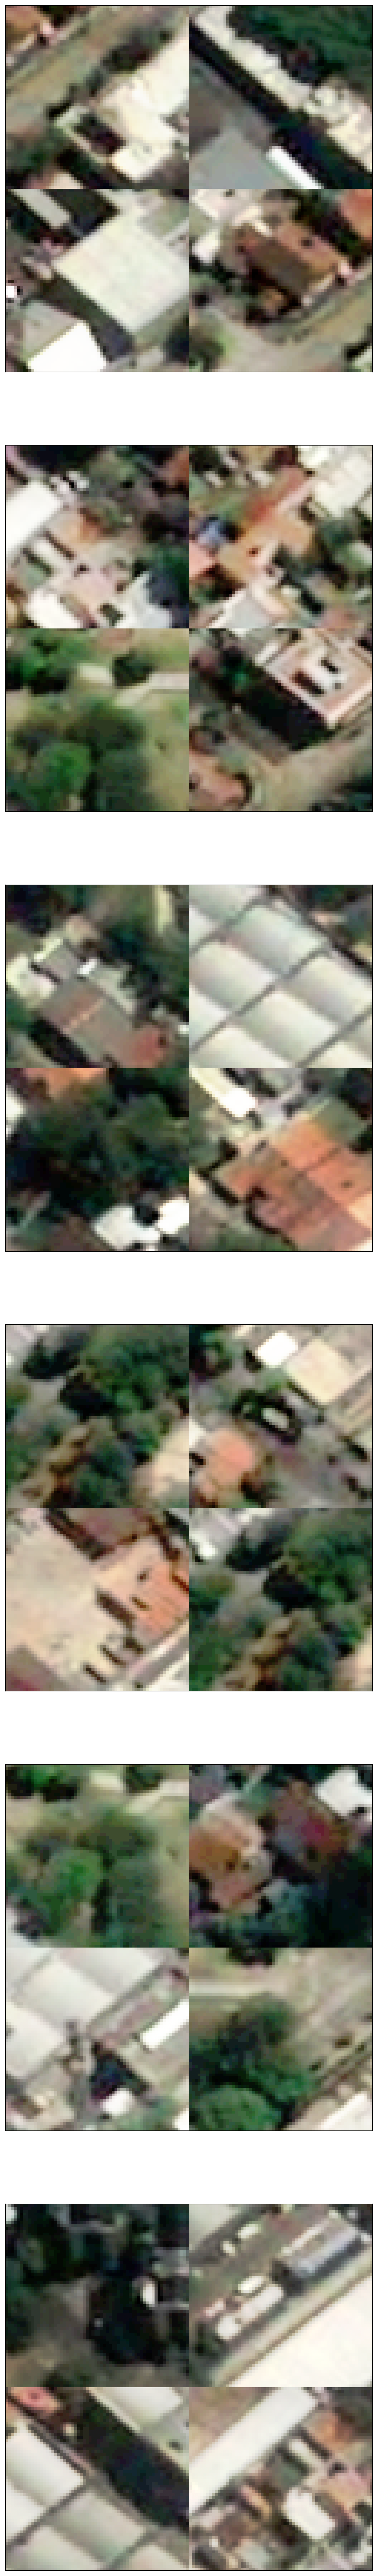

In [37]:
# Params:
image_size = 128
tiles = 2
bias = 1
link = "068613306"

tile_size = image_size / tiles

current_ds_name = icpag.loc[icpag.link == link, "dataset"].values[0]
current_ds = datasets[current_ds_name]

actual_size = image_size // tiles * tiles

fig, axs = plt.subplots(6,1, figsize=(10, 60), facecolor='w', edgecolor='k', dpi=200)
# fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

imgs = []
points = []
all_boundaries = []

for i in range(0, 6):
    img, point, boundaries, total_bounds = utils.random_image_from_census_tract(
        current_ds, icpag, link, tiles=tiles, size=actual_size, bias=bias,
    )
    img = skimage.exposure.equalize_hist(img) # stretch

    ep.plot_rgb(img,
            rgb=[0, 1, 2],
            ax=axs[i])
    points += [point]
    all_boundaries += [boundaries]

shp_point = [shapely.geometry.Point(x, y) for x, y in points]
points = gpd.GeoDataFrame(geometry=shp_point).set_crs(epsg=4326)

In [38]:
composition = 0

other_pics = [shapely.geometry.Polygon(poly) for poly in all_boundaries[composition]]
boundaries = gpd.GeoDataFrame(geometry=other_pics).set_crs(epsg=4326)

# Radio censal
m = icpag[icpag.link== "068613306"].explore(
    style_kwds={'fill':False, 'color':'red', "weight":7},
    tiles="https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}", attr="ESRI",
    )

# Imagenes
for row in range(len(boundaries)):
    boundaries.iloc[row:row+1, :].explore(
        m=m,     style_kwds={'fill':False, 'color':'red', "weight":5})

# Satellite img
bounds = icpag[icpag.link== "068613306"].buffer(0.005).bounds
bounds = [
    [bounds['miny'].values[0], bounds['minx'].values[0]],
    [bounds['maxy'].values[0], bounds['maxx'].values[0]]
]
sat_img = current_ds.sel(x=slice(bounds[0][1], bounds[1][1]), 
                         y=slice(bounds[1][0], bounds[0][0]))
sat_img = sat_img['band_data'].values[:3,:,:] # To rgb
sat_img = np.moveaxis(sat_img, 0, 2) # Reorder axis to work as usual
sat_img = skimage.exposure.equalize_hist(sat_img) # stretch
# folium.raster_layers.ImageOverlay(sat_img, opacity=1,
#                                  bounds = bounds).add_to(m)
#
folium.LayerControl().add_to(m)
m

C:\Users\ofici\AppData\Local\Temp\ipykernel_11568\70597785.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bounds = icpag[icpag.link== "068613306"].buffer(0.005).bounds


c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


# Distribución Train-test

In [41]:
def bounds_to_box(row):
    
    box = [
        [row['min_y'], row['min_x']],
        [row['min_y'], row['max_x']],
        [row['max_y'], row['max_x']],
        [row['max_y'], row['min_x']],
    ]
    return box


In [10]:
import pandas as pd
import seaborn as sns

In [11]:
sample = 5
image_size = 512
path_dataout = "D:/Maestría/Tesis/Repo/data/data_out"
metadata = pd.read_csv(rf"{path_dataout}/size{image_size}_sample{sample}/metadata.csv")

metadata.loc[metadata['type']=='train', "type"] = "Datos de Entrenamiento"
metadata.loc[metadata['type']=='test', "type"] = "Datos de Prueba"
metadata.rename(columns={'type':' ', 'var':'Ingreso estimado (estandarizado)'}, inplace=True)
# metadata['box'] = metadata.apply(bounds_to_box, axis=1)

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(4.069444444444445, 0.5, 'Densidad')

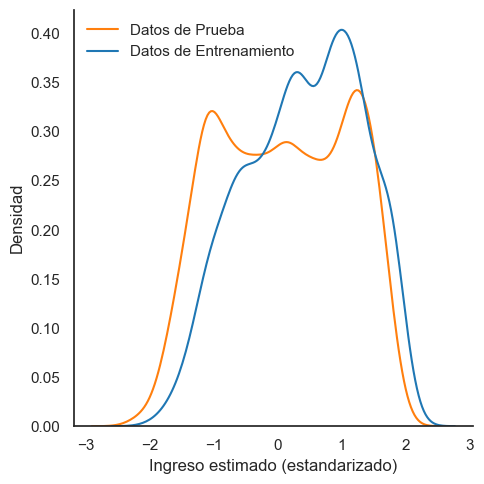

In [19]:
sns.set_theme(style="white", palette=None)
sns.displot(data=metadata[metadata['sample']==0], x="Ingreso estimado (estandarizado)", common_norm=False, hue=" ",  kind='kde', fill=False, legend=False)
plt.legend(metadata[' '].dropna().unique(), loc='upper left', frameon=False)
# Change axis labels
plt.ylabel("Densidad")
# plt.savefig(rf"D:\Maestría\Tesis\Repo\outputs\kde_train_test.png", dpi=600, bbox_inches='tight')

In [ ]:
%tensorboard

In [24]:
metadata.image = metadata.image.str.replace("/mnt/d", "D:/")

# Imagenes ya generadas

In [ ]:
# Params:
image_size = 500
tiles = 2
bias = 2
link = 65150309
tile_size = image_size / tiles


fig, axs = plt.subplots(1,1, figsize=(10, 60), facecolor='w', edgecolor='k', dpi=200)
# fig.subplots_adjust(hspace = .5, wspace=.001)

imgs = []

img = np.load(metadata.loc[metadata.link == link, "image"].values[0])
img = skimage.exposure.equalize_hist(img) # stretch

ep.plot_rgb(img,
        rgb=[0, 1, 2],
        ax=axs)


shp_point = [shapely.geometry.Point(
        metadata.loc[metadata.link == link, "x"].values[0], 
        metadata.loc[metadata.link == link, "y"].values[0])
        ]
points = gpd.GeoDataFrame(geometry=shp_point).set_crs(epsg=4326)

In [20]:
icpag.to_parquet(r"D:\Maestría\Tesis\Repo\data\data_in\ICPAG\icpag.parquet")

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)



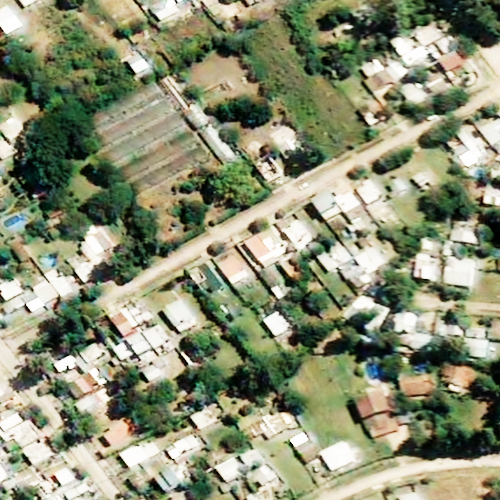

In [48]:
import ast

composition = 0
tiles_boundaries = metadata.loc[metadata.link == link,"tiles_boundaries"].values[0]
link_str = f'0{link}'
box = metadata.loc[metadata.link == link, "box"].values[0]
current_ds = datasets[icpag.loc[icpag.link== link_str, "dataset"].values[0]]

# Radio censal
m = icpag[icpag.link== link_str].explore(
    style_kwds={'fill':False, 'color':'red', "weight":7},
    tiles="https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}", attr="ESRI",
    )

# Imagenes
other_pics = [shapely.geometry.Polygon(poly) for poly in ast.literal_eval(tiles_boundaries)]
boundaries = gpd.GeoDataFrame(geometry=other_pics).set_crs(epsg=4326)

for row in range(len(boundaries)):
    boundaries.iloc[row:row+1, :].explore(
        m=m,     style_kwds={'fill':False, 'color':'red', "weight":5})

# Satellite img
sat_img_ds = current_ds.sel(y=slice(box[3][0], box[0][0]), 
                         x=slice(box[0][1], box[1][1]))
sat_img = sat_img_ds['band_data'].values[:3,:,:] # To rgb
sat_img = np.moveaxis(sat_img, 0, 2) # Reorder axis to work as usual
sat_img = skimage.exposure.equalize_hist(sat_img) # stretch
mins = box[0]
maxs = box[2]
folium.raster_layers.ImageOverlay(sat_img, opacity=1,
                                 bounds = [mins, maxs]).add_to(m)

# Add line train test split
coordinates = [[-34.7, -58.71], [-34.3, -58.71]]
my_PolyLine=folium.PolyLine(locations=coordinates,weight=5, color='pink')
m.add_child(my_PolyLine)

# Box from list of points
my_box=folium.Rectangle(bounds=box)
m.add_child(my_box)

folium.LayerControl().add_to(m)
m

# Train-test Split

In [40]:
gdf = gpd.GeoDataFrame(metadata, 
        geometry=gpd.points_from_xy(metadata['x'], metadata['y']),
        crs=4326,
)

In [ ]:
gdf.explore(column="type")
# plt.axis('off')
#FIXME: el lado derecho del bloque 1 se ve raro... Quizas esté bien y sea un tema del tamaño del RC

In [79]:
gdf.geometry.total_bounds

array([-58.84920321, -34.90700324, -58.22497588, -34.26969326])

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.

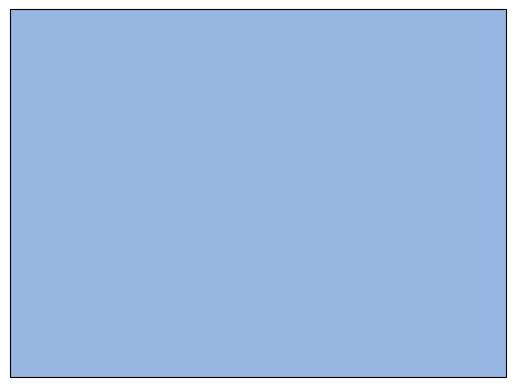

In [84]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-68.22497588, -34.9, -58.8, -34.26969326], crs=ccrs.epsg(26910))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

# Data Augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

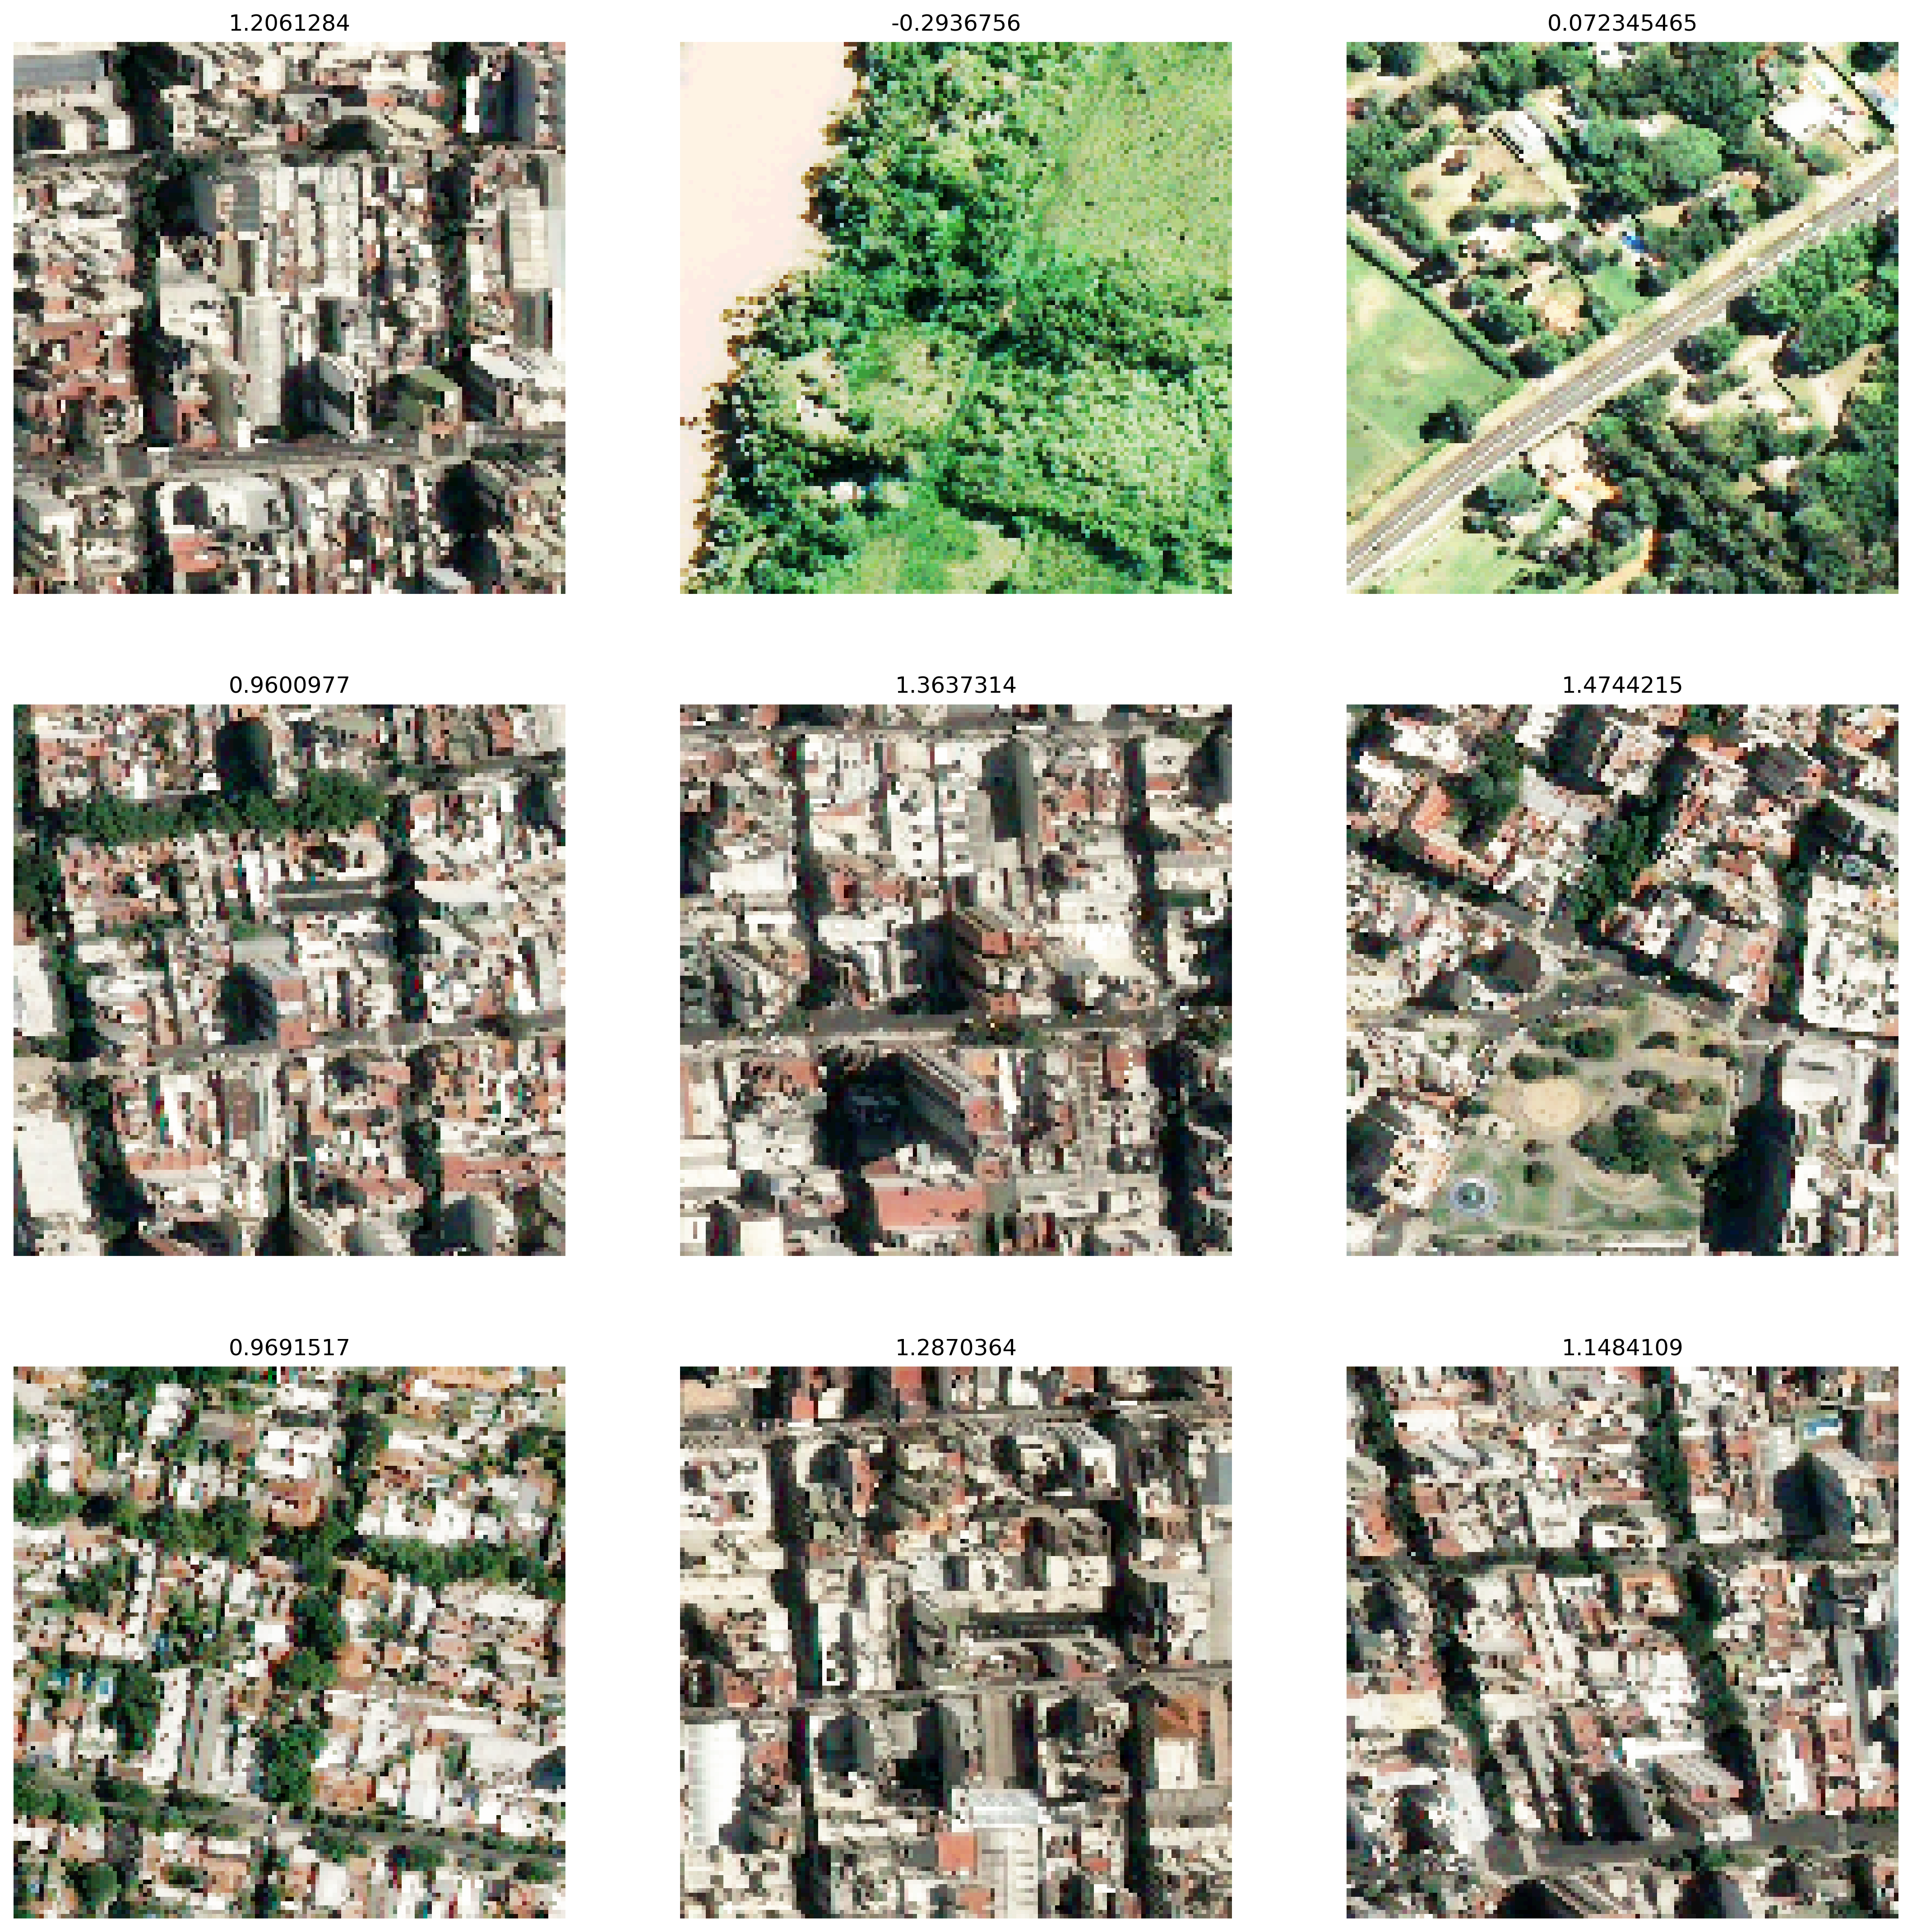

In [2]:
imgs = np.load(r"D:\Maestría\Tesis\Repo\outputs\test_example_4_imgs.npy")
labs = np.load(r"D:\Maestría\Tesis\Repo\outputs\test_example_4_labs.npy")

plt.figure(figsize=(18, 18), dpi=300)
for pos in range(9):
  ax = plt.subplot(3, 3, pos + 1)
  img = imgs[pos]  
  img = img # Change red for infrared
  img = img[:,:,:3]
  plt.imshow(img)
  plt.title(labs[pos])
  plt.axis("off")


In [12]:
img.shape

(512, 512, 3)

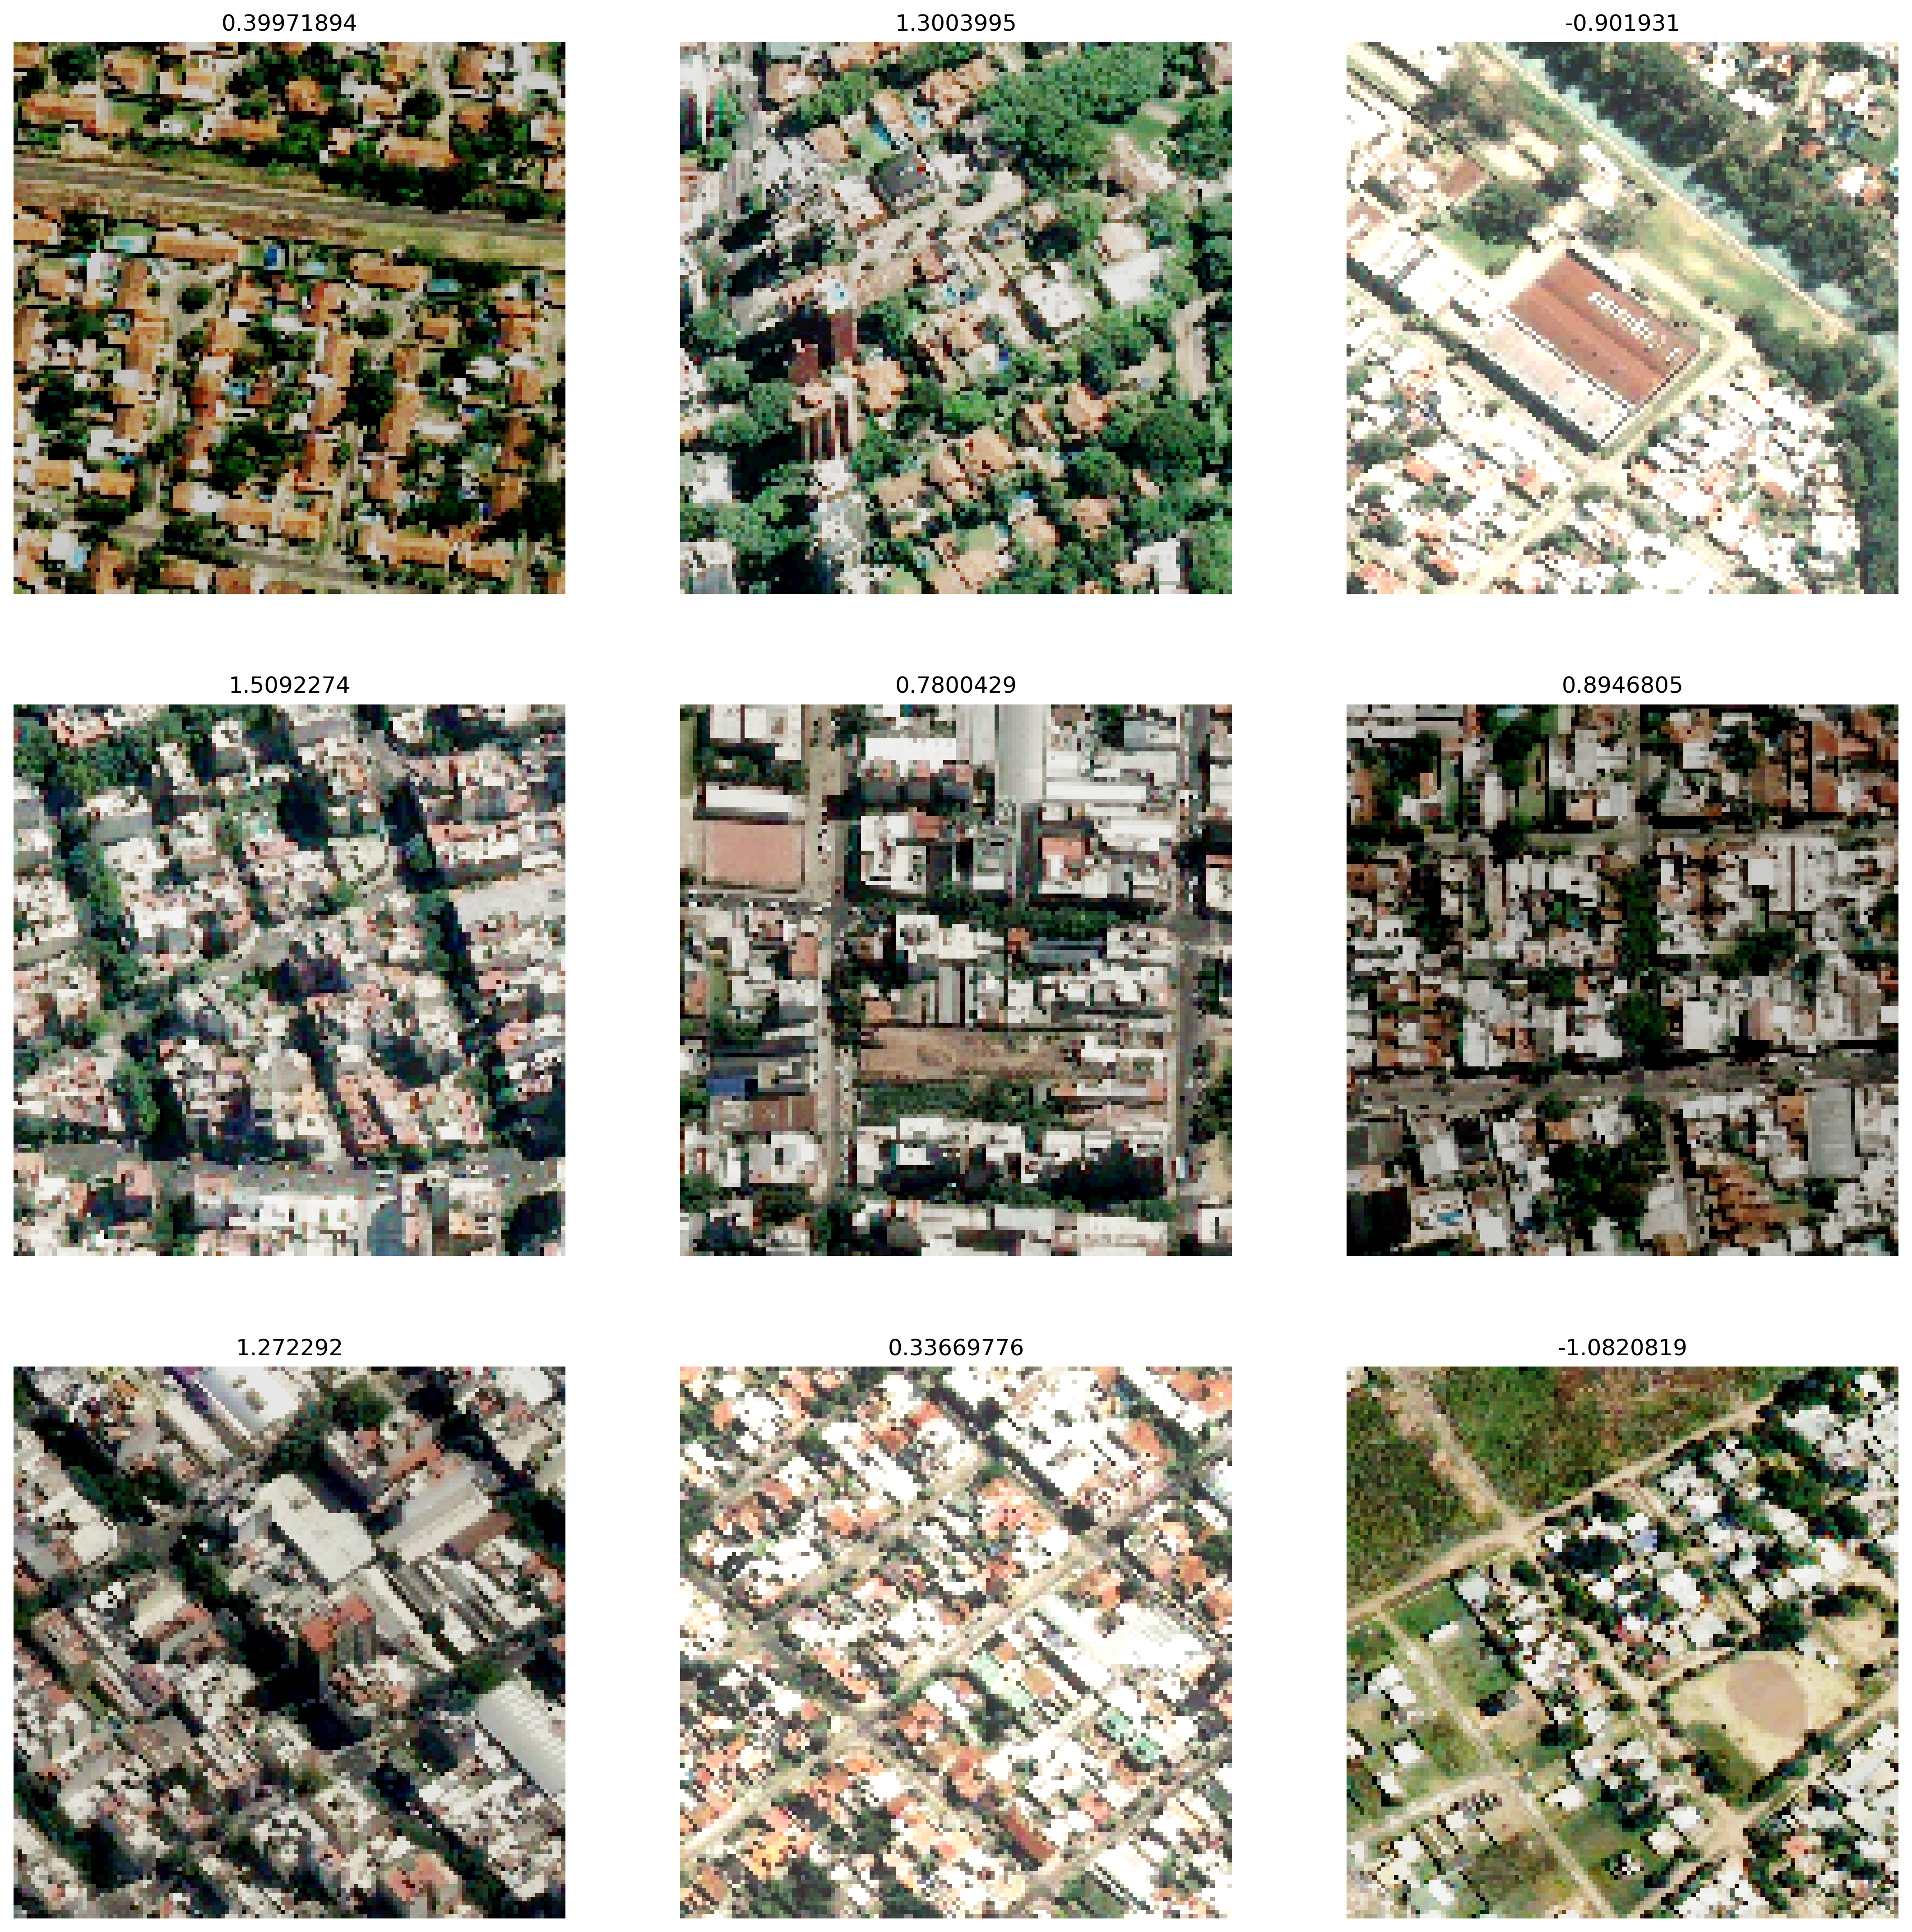

In [3]:
i = 0
plt.figure(figsize=(18, 18), dpi=300)
for pos in range(9):
    imgs = np.load(rf"D:\Maestría\Tesis\Repo\outputs\train_example_{i}_imgs.npy")
    labs = np.load(rf"D:\Maestría\Tesis\Repo\outputs\train_example_{i}_labs.npy")

    ax = plt.subplot(3, 3, pos + 1)
    img = imgs[pos][:,:,:3]
    plt.imshow(img)
    plt.title(labs[pos])
    plt.axis("off")
    i+=1
    if i ==5:
        i=0      


In [6]:
%tensorboard

UsageError: Line magic function `%tensorboard` not found.


# Visualizar Pansharpening

In [1]:
import xarray as xr

ms = xr.open_dataset(r"E:\Imagenes Satelitales\2013\IMG_PHR1A_MS_201302051412270_ORT_6741387101-2_R1C1.TIF")
pan = xr.open_dataset(r"E:\Imagenes Satelitales\2013\IMG_PHR1A_P_201302051412270_ORT_6741387101-1_R1C1.TIF")
ps = xr.open_dataset(r"D:\Maestría\Tesis\Repo\data\data_in\Pansharpened\2013\pansharpened_6741387101_R1C1.tif")

In [93]:
slice_x = slice(-58.43522222222223,  -58.43522222222223+0.002)
slice_y = slice( -34.54679629629628,  -34.54679629629628-0.002)

In [94]:
ms_img = ms.sel(x=slice_x, y=slice_y).band_data.values
pan_img = pan.sel(x=slice_x, y=slice_y).band_data.values
ps_img = ps.sel(x=slice_x, y=slice_y).band_data.values

In [95]:
ms_img

array([[[ 888.,  534.,  485., ...,  823., 1073., 1262.],
        [1090.,  755.,  748., ...,  973., 1245., 1204.],
        [1253.,  993.,  993., ..., 1083., 1250., 1092.],
        ...,
        [1039., 1078., 1088., ...,  677.,  670.,  675.],
        [1447., 1503., 1471., ...,  665.,  687.,  714.],
        [1605., 1651., 1615., ...,  650.,  704.,  745.]],

       [[ 738.,  551.,  524., ..., 1127., 1270., 1129.],
        [ 905.,  713.,  758., ..., 1006., 1198., 1043.],
        [1142.,  992., 1036., ...,  905.,  964.,  940.],
        ...,
        [ 905.,  925.,  984., ...,  987.,  994.,  999.],
        [1179., 1171., 1164., ...,  987.,  989.,  992.],
        [1383., 1326., 1238., ...,  984.,  982.,  984.]],

       [[ 612.,  520.,  499., ...,  857., 1100., 1043.],
        [ 648.,  560.,  633., ...,  758., 1027., 1001.],
        [ 756.,  676.,  749., ...,  706.,  817.,  871.],
        ...,
        [ 749.,  763.,  777., ...,  631.,  636.,  638.],
        [1003.,  961.,  879., ...,  633.,  63

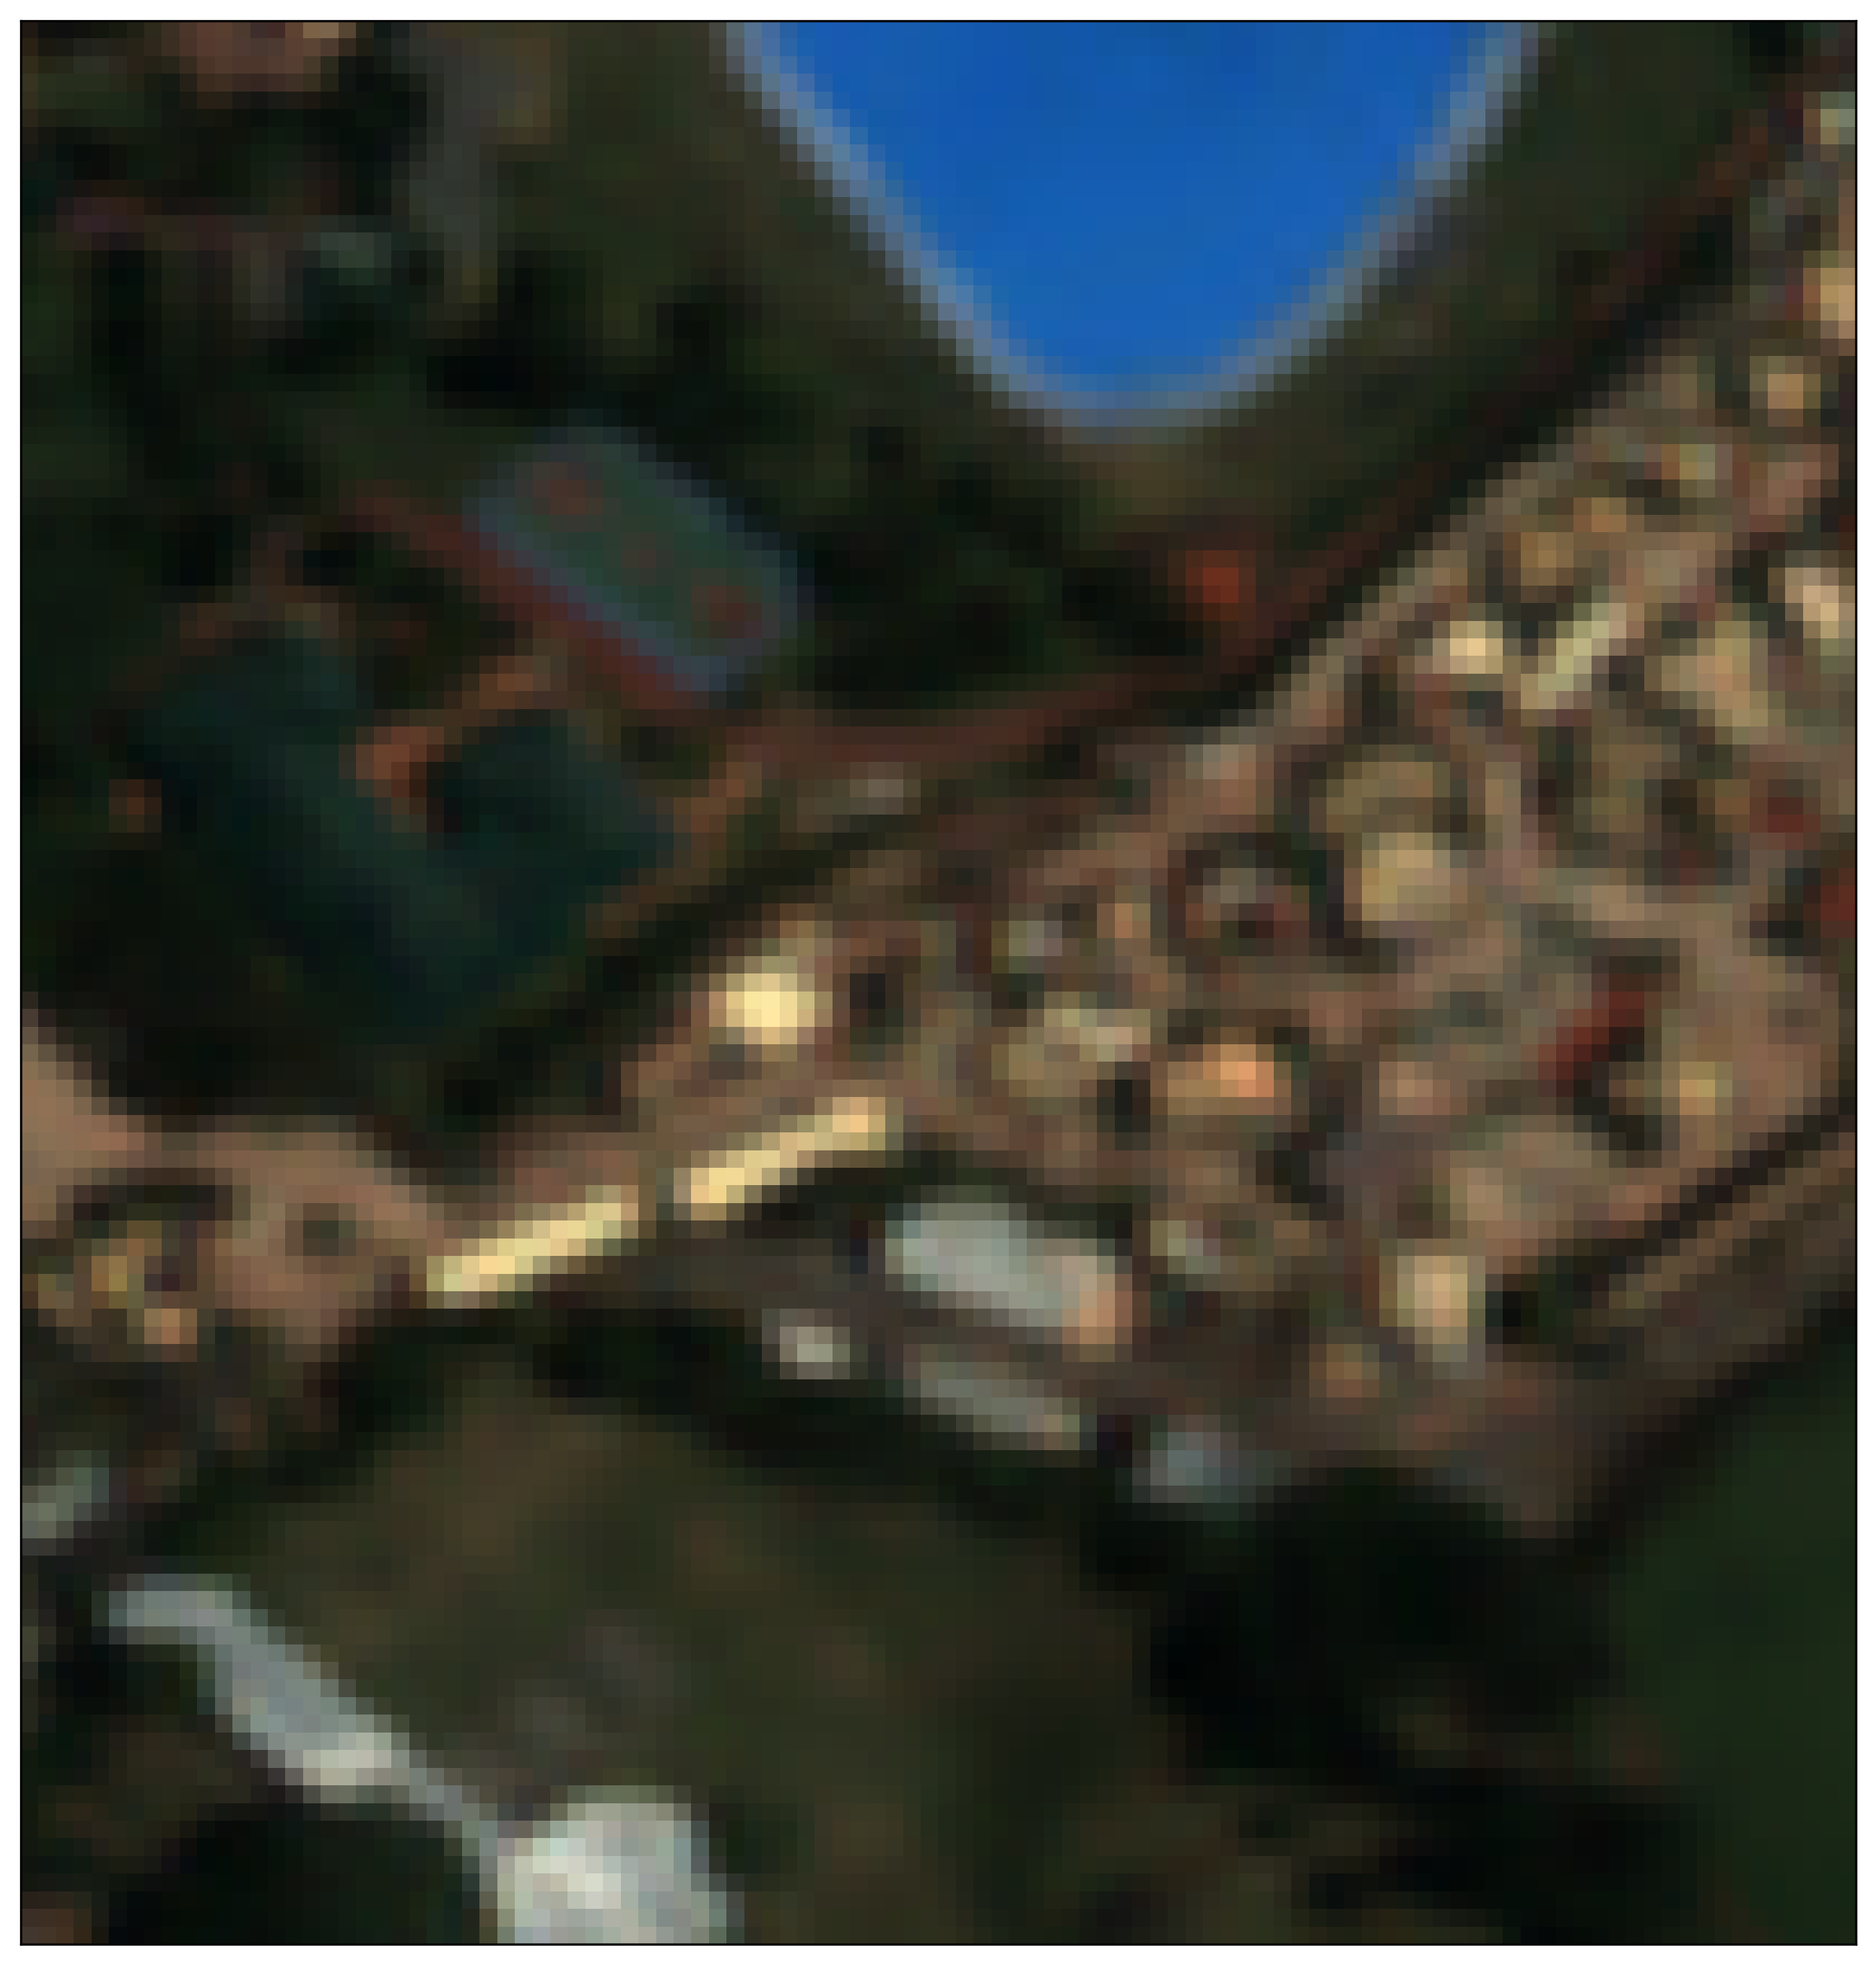

In [106]:
import earthpy.plot as ep
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
ep.plot_rgb(ms_img, ax=ax)
f.savefig(r"D:\Maestría\Tesis\Repo\outputs\ms_example.png", dpi=300, bbox_inches='tight')

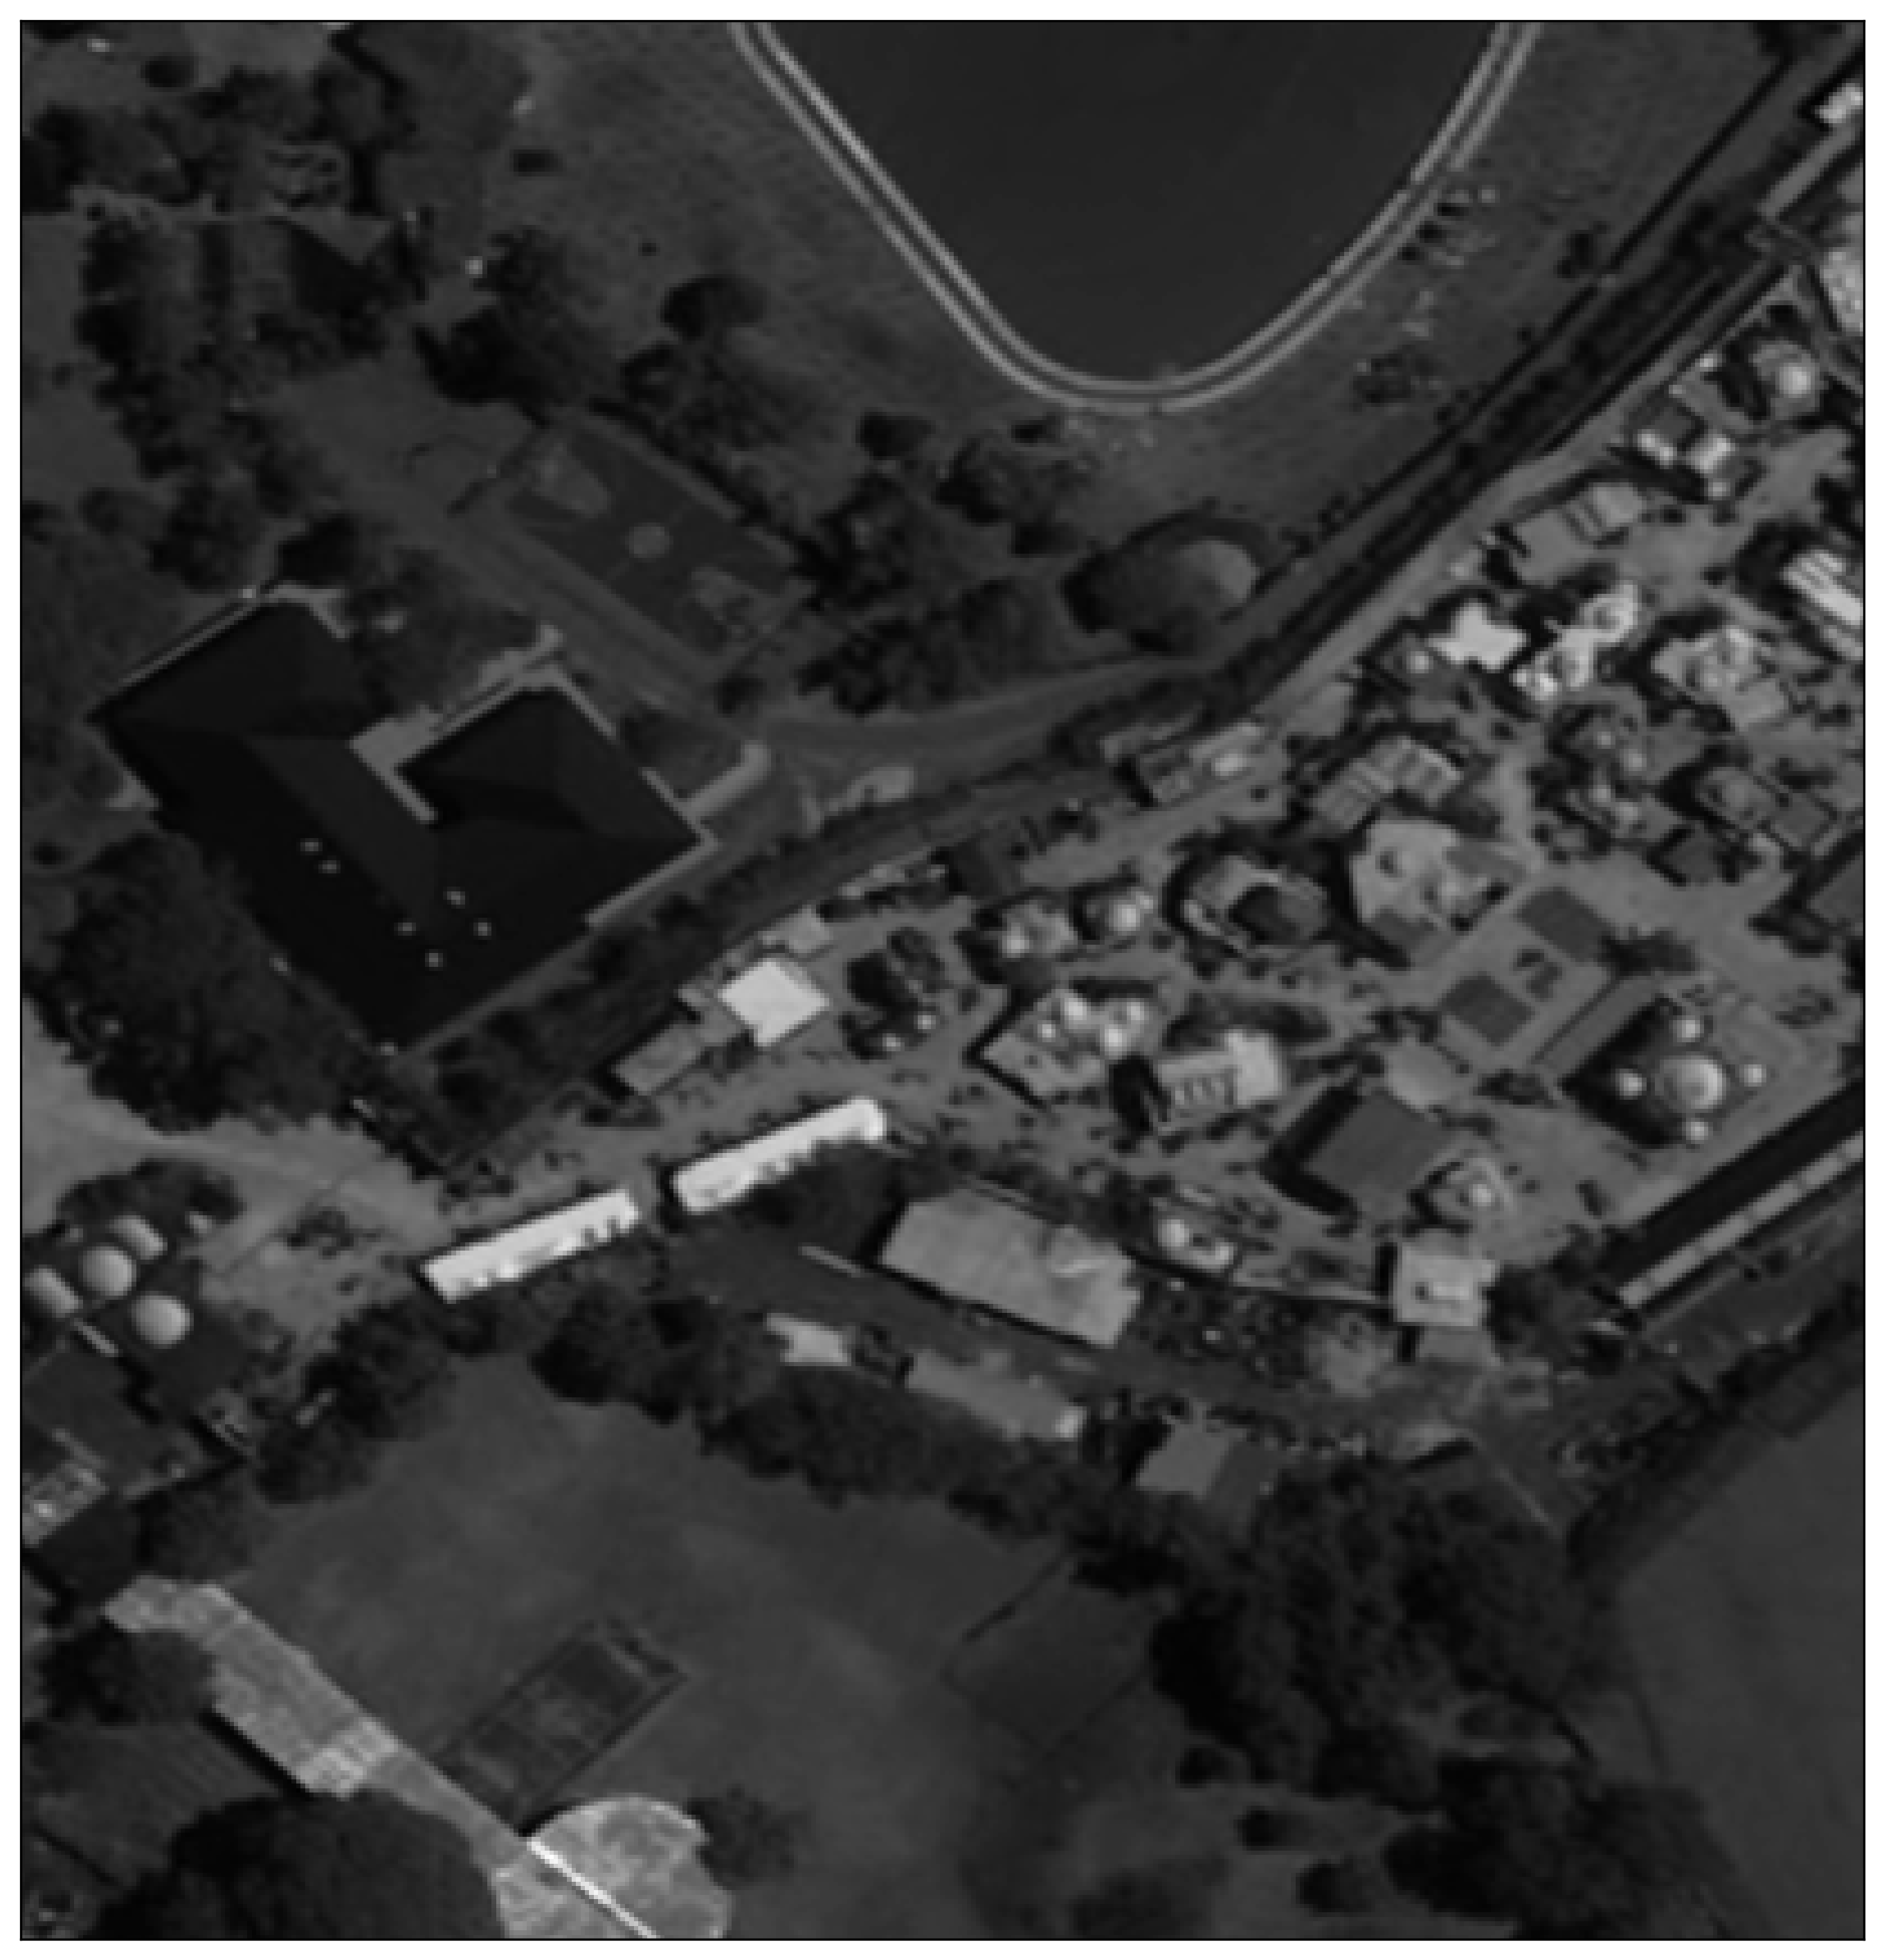

In [102]:
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
ep.plot_bands(pan_img, cmap='Greys_r', cbar=False, ax=ax, figsize=(12, 12))
plt.savefig(r"D:\Maestría\Tesis\Repo\outputs\pan_example.png", dpi=300, bbox_inches='tight')

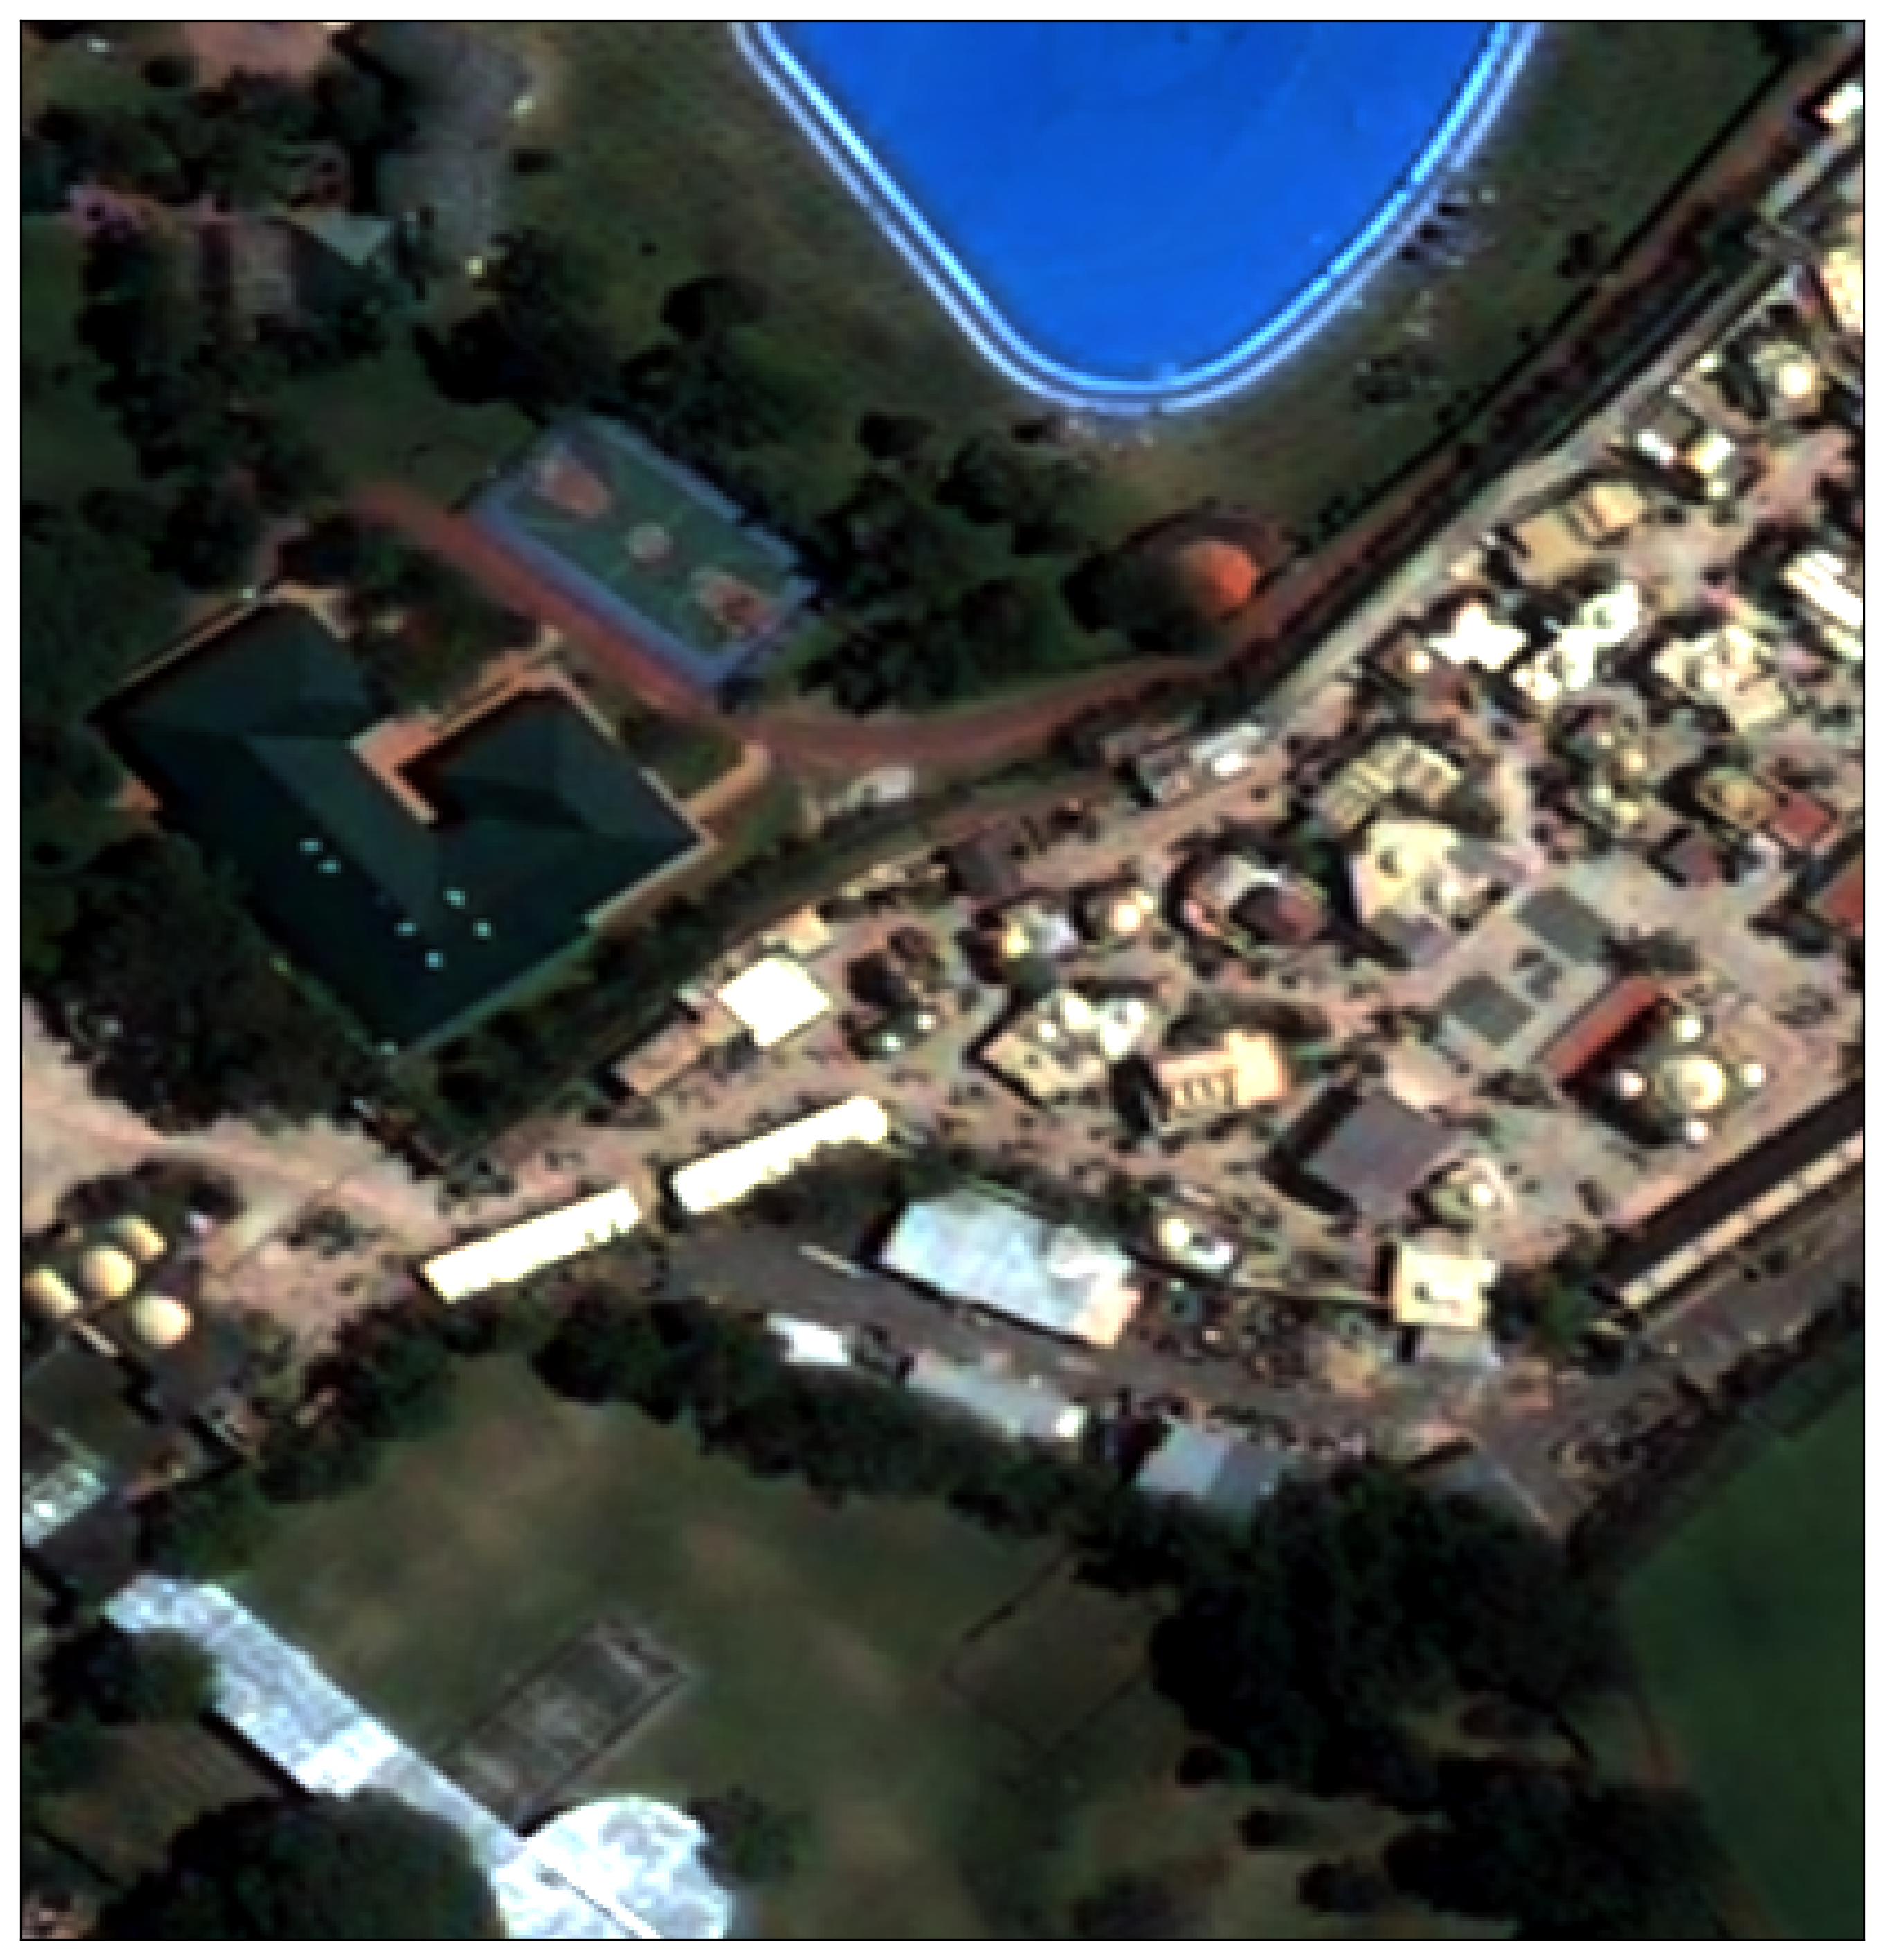

In [104]:
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
ep.plot_rgb(ps_img, figsize=(12, 12), ax=ax, stretch=True)
plt.savefig(r"D:\Maestría\Tesis\Repo\outputs\ps_example.png", dpi=300, bbox_inches='tight')

## Visualizar Grilla

In [ ]:
import importlib
import build_dataset
import run_model
import utils
import matplotlib
import geopandas as gpd
from shapely import Polygon
importlib.reload(build_dataset)
importlib.reload(utils)

link = '064100610'

# Load datasets
datasets, extents = build_dataset.load_satellite_datasets()
icpag = build_dataset.load_icpag_dataset()
icpag = build_dataset.assign_links_to_datasets(icpag, extents, verbose=False)

# Get the dataset with the images of the selected link
ds = build_dataset.get_dataset_for_link(icpag, datasets, link)

# Get the grid of the images
images, points, bounds = build_dataset.get_gridded_images_for_link(
    ds, icpag, link, tiles=1, size=128, resizing_size=128, bias=4, sample=1, to8bit=True
)

# Compute loss
df_prediciones, mse = run_model.compute_custom_loss(
    model, metadata[metadata.link == int(link)], tiles, size, resizing_size, bias, sample, to8bit
)

# Make geodataframe with the images and its predictions
polygons = [Polygon(bound[0]) for bound in bounds]
predictions = df_prediciones[df_prediciones['link']==link].predictions.values[0]
predictions_gdf =  gpd.GeoDataFrame(predictions, geometry=polygons).rename(columns={0:'predictions'}).set_crs(epsg=4326)

#### Plot
import folium
# Plot census tract
m = icpag[icpag.link == link].explore(
        tiles="https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}", attr="ESRI",
        
)
# Plot gridded predictions
predictions_gdf.explore(column='predictions', cmap='Spectral', vmin=-1, vmax=1, m=m)

# Add control for switching between layers
folium.LayerControl().add_to(m)
m